# Implémentation d'un modèle séquentiel Keras 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import random
data_load = False
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

## Load data

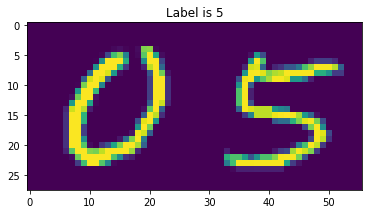

In [2]:
if not data_load :
    train_x = pd.read_csv('./classification-of-mnist-digits/train.csv')
    train_y = pd.read_csv('./classification-of-mnist-digits/train_result.csv')
    test_x = pd.read_csv('./classification-of-mnist-digits/test.csv')
    data_load = True
for i in train_x.index:
    data = train_x.loc[i].values[:-1].reshape(28,56)
    plt.title(f'Label is {train_y.loc[i].values[1]}')
    plt.imshow(data)
    plt.show()
    break

In [3]:
train_x = train_x.iloc[: , :-1].to_numpy()
test_x = test_x.iloc[: , :-1].to_numpy()
train_y = np.squeeze(train_y.iloc[:,1:].to_numpy())

## Construction du modèle

In [13]:
model = Sequential()
model.add(Dense(32, input_dim = 1568, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(19, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                50208     
                                                                 
 dense_16 (Dense)            (None, 64)                2112      
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 19)                4883      
                                                                 
Total params: 98,547
Trainable params: 98,547
Non-trainable params: 0
_________________________________________________________________


## Entraînement du modèle

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2), metrics = ['accuracy'])
history = model.fit(train_x, train_y, epochs = 25, batch_size = 32, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2925 - accuracy: 0.1944 - val_loss: 2.1257 - val_accuracy: 0.2354
Epoch 2/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0796 - accuracy: 0.2584 - val_loss: 2.0119 - val_accuracy: 0.2783
Epoch 3/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0046 - accuracy: 0.2917 - val_loss: 1.9835 - val_accuracy: 0.3041
Epoch 4/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9715 - accuracy: 0.3102 - val_loss: 1.9785 - val_accuracy: 0.3037
Epoch 5/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9483 - accuracy: 0.3147 - val_loss: 2.0101 - val_accuracy: 0.3188
Epoch 6/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9310 - accuracy: 0.3226 - val_loss: 1.9378 - val_accuracy: 0.3318
Epoch 7/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9229 - accuracy: 0.3264 - val_loss: 1.9439 - val_accuracy:

## Courbes évolution de la loss et de l'accuracy

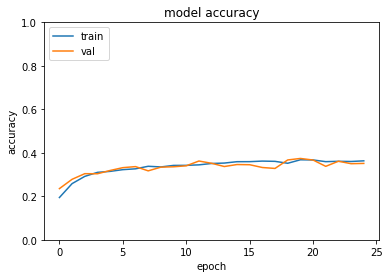

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

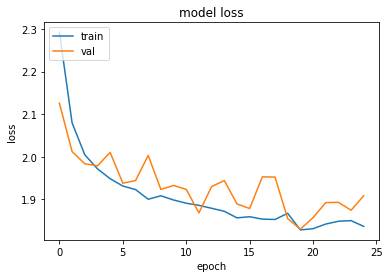

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prédiction obtenue pour le jeu de test

In [ ]:
pred = model.predict(test_x)
pred = np.argmax(pred, axis = 1)
print(pred)

313/313 [==============================] - 1s 2ms/step
[11  7 10 ... 10  4  6]


## Chargement des résultats dans un csv conforme

In [ ]:
# creating a list of index names
index_values = [i for i in range(0, 10000)]
# creating a list of column names
column_values = ['Index', 'Class']
  
# creating the dataframe
df = pd.DataFrame(columns = column_values, index = index_values)
df['Class']= pred
df['Index']= index_values
print(df)
df.to_csv('./submission_Keras_batch1.csv', index=False)

      Index  Class
0         0     11
1         1      7
2         2     10
3         3      7
4         4      5
...     ...    ...
9995   9995      7
9996   9996     12
9997   9997     10
9998   9998      4
9999   9999      6

[10000 rows x 2 columns]
